## Perform 10 realisations of a $\sigma = 10$ Layer


In [1]:
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages

from readConfigs import LayerFromYAML, loadConfiguration, allPlasmoidsFromYAML
from Plotting import chainPlots, plotSizeHists, plotMomentumHists, plotEvolutionSizeColor, plotEvolutionFilled
from PlasmoidStatistics import createHistograms
from Histograms.HistogramManager import HistogramManager
from Histograms.Histogram import Histogram
import setFigureConfig as sfc

configPath = "sigma10.yaml"
plotPathChain = "ChainPlots/"

#### Calculate Evolution
saves the results to sigma3.h5 with keys following allPlasmoids_i

In [ ]:
LayerFromYAML(configPath)

#### Plot evolution of layers for each realisation

In [ ]:
configs = loadConfiguration(configPath)
name = configs["name"]
repetitions = int(configs["repetitions"])
for i in range(repetitions):
    print("plotting" + name + " " + str(i))

    # allPlasmoids = allPlasmoidsFromYAML(configPath, id=i)
    # f = plotEvolutionFilled(
    #     allPlasmoids, Ncol=50, minLifeTime=0.35
    # )
    # f.savefig("Evolutionfilled_" + str(i) + ".pdf")

    # plot in one pdf
    pdf = PdfPages(plotPathChain + name + "_Chain" + str(i) + ".pdf")

    fig_evo, fig_size, fig_ini = chainPlots(configPath, i,
                                            minLifeTime=0.35)

    # save evolution plot
    fig_evo.savefig(
        plotPathChain + name + "_Chain" + str(i) + "_evo.png", dpi=300
    )
    pdf.savefig(fig_evo)

    # save size plot
    fig_size.savefig(
        plotPathChain + name + "_Chain" + str(i) + "_size.png", dpi=300
    )
    pdf.savefig(fig_size)

    # save initials plot
    fig_ini.savefig(
        plotPathChain + name + "_Chain" + str(i) + "_ini.png", dpi=300
    )
    pdf.savefig(fig_ini)

    pdf.close()

#### Calculate histograms from the simulated layers

In [3]:
configs = loadConfiguration(configPath)
name = configs["name"]
repetitions = int(configs["repetitions"])

sRange = np.array([-3.125, -0.375]) + 0.125
sNBins = 11
pRange = [-0.1, 3.5]
pNBins = 18
hm = HistogramManager()
nBins = 2
binSize = 2
tauMins = np.arange(nBins) * binSize
tauMaxs = tauMins + binSize
for j in range(nBins):
    # calculate mean of histograms
    hs_mean = Histogram(
        "log10s_" + name + "_mean" +
        "_tau" + str(tauMins[j]) + "-" + str(tauMaxs[j]),
        histRange=sRange, nBins=sNBins
    )
    hp_mean = Histogram(
        "p_normed_" + name + "_mean" +
        "_tau" + str(tauMins[j]) + "-" + str(tauMaxs[j]),
        histRange=pRange, nBins=pNBins,
    )
    for i in range(repetitions):
        print("calculating histogram of " + name + " " + str(i))

        hs, hp = createHistograms(
            configPath, i, tauMin=tauMins[j], tauMax=tauMaxs[j],
            sRange=sRange, sNBins=sNBins, pRange=pRange, pNBins=pNBins#,
            #sMin=10**-2, MinLifetime=0.
        )
        hm.addHistogram(
            hs.getLabel(), hs
        )
        hm.addHistogram(
            hp.getLabel(), hp
        )
        hs_mean += hs
        hp_mean += hp
    hs_mean = hs_mean / repetitions
    hs_mean.setLabel(
        "log10s_" + name + "_mean" +
        "_tau" + str(tauMins[j]) + "-" + str(tauMaxs[j])
    )
    hp_mean = hp_mean / repetitions
    hp_mean.setLabel(
        "p_normed_" + name + "_mean" +
        "_tau" + str(tauMins[j]) + "-" + str(tauMaxs[j])
    )
    hm.addHistogram(
        hs_mean.getLabel(), hs_mean
    )
    hm.addHistogram(
        hp_mean.getLabel(), hp_mean
    )
# save everything
hm.saveHistogramDict(name + "_histograms.p")

calculating histogram of sigma10 0


/mnt/u/ToolBox/Histograms/Histogram.py:109: RuntimeWarning: invalid value encountered in true_divide
  self.sigCounts = self.counts / np.sqrt(counts0)


calculating histogram of sigma10 1
calculating histogram of sigma10 2
calculating histogram of sigma10 3
calculating histogram of sigma10 4
calculating histogram of sigma10 5
calculating histogram of sigma10 6
calculating histogram of sigma10 7
calculating histogram of sigma10 8
calculating histogram of sigma10 9
calculating histogram of sigma10 0
calculating histogram of sigma10 1
calculating histogram of sigma10 2
calculating histogram of sigma10 3
calculating histogram of sigma10 4
calculating histogram of sigma10 5
calculating histogram of sigma10 6
calculating histogram of sigma10 7
calculating histogram of sigma10 8
calculating histogram of sigma10 9


#### Plot Histograms

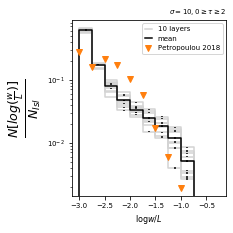

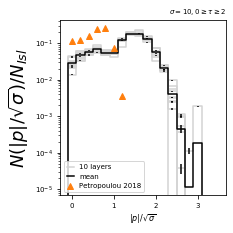

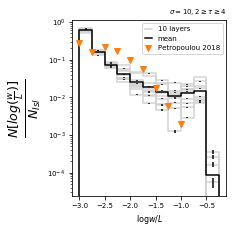

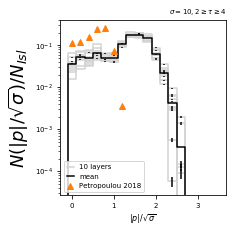

In [4]:
configs = loadConfiguration(configPath)
name = configs["name"]

sfc.halfWidth(aspectRatio=1)

nBins = 2
binSize = 2
tauMins = np.arange(nBins) * binSize
tauMaxs = tauMins + binSize
for i in range(nBins):
    tauName = "_tau" + str(tauMins[i]) + "-" + str(tauMaxs[i])
    # size histograms plot
    fig = plotSizeHists(configPath, tauMin=tauMins[i], tauMax=tauMaxs[i])
    fig.savefig(name + "_SizeHists" + tauName + ".pdf")

    # momentum histograms plot
    fig = plotMomentumHists(
        configPath, tauMin=tauMins[i], tauMax=tauMaxs[i]
    )
    fig.savefig(name + "_MomentumHists" + tauName + ".pdf")